In [2]:
import numpy as np
import scipy as sp
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from ipywidgets import interact
from os import path

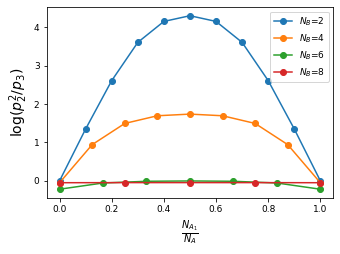

In [116]:
N=12

Nblist=np.arange(2,N-2,2)

plt.figure(figsize=(4.8,3.6))
fsize=9
plt.rcParams.update({'font.size': fsize})
for Nb in Nblist:
    Na=N-Nb
    La=2**Na
    Na1=np.arange(0,Na+1)
    Na2=Na-Na1
    La1= 2**Na1
    La2= 2**Na2
    Lb=2**Nb

    p2= (La+Lb)/(La*Lb)
    p3= (La1**2+ La2**2+ Lb**2 + 3*La*Lb)/(La*Lb)**2 

    plt.plot(Na1/Na,np.log(p2**2/p3),'o-',label='$N_B$=%d' % Nb)
    # plt.plot(Na1/Na,p2)

plt.ylabel('$\log(p_2^2/p_3)$',fontsize = fsize+5)
plt.xlabel('$\\frac{N_{A_1}}{N_A}$',fontsize = fsize+5)
plt.legend(fontsize=fsize)
plt.tight_layout()
# plt.savefig('figs/rmt_p3_Na_%d.pdf' % (Na))
plt.show()

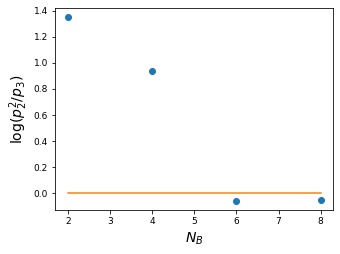

In [109]:
N=12

Nblist=np.arange(2,N-2,2)
Lb=2**Nblist
Na=N-Nblist
La=2**Na
Na1=1 #Na/2
Na2=Na-Na1
La1= 2**Na1
La2= 2**Na2

p2= (La+Lb)/(La*Lb)
p3= (La1**2+ La2**2+ Lb**2 + 3*La*Lb)/(La*Lb)**2 

plt.figure(figsize=(4.8,3.6))
fsize=9
plt.rcParams.update({'font.size': fsize})
plt.plot(Nblist,np.log(p2**2/p3),'o')
plt.plot(Nblist,Nblist*0)
# plt.plot(Na1/Na,p2)

plt.ylabel('$\log (p_2^2/p_3)$',fontsize = fsize+5)
plt.xlabel('$N_{B}$',fontsize = fsize+5)
# plt.ylim(-.2,0.1)
# plt.grid()
plt.tight_layout()
# plt.savefig('figs/rmt_p3_ppt_Na_%d_Nb_%d.pdf' % (Na,Nb))
plt.show()

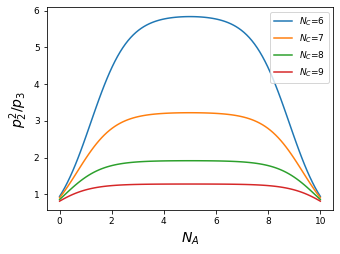

In [34]:
Na=10
La=2**Na
# Na1=np.arange(0,Na+1)
Na1=np.linspace(0,1,100)*Na
Na2=Na-Na1
La1= 2**Na1
La2= 2**Na2

Nblist=np.arange(6,10)

plt.figure(figsize=(4.8,3.6))
fsize=9
plt.rcParams.update({'font.size': fsize})
for Nb in Nblist:
    Lb=2**Nb
    p2= (La+Lb)/(La*Lb)
    p3= (La1**2+ La2**2+ Lb**2 + 3*La*Lb)/(La*Lb)**2 

    plt.plot(Na1,p2**2/p3,label='$N_C$=%d' % Nb)
#     plt.plot(Na1,np.log(p2**2)/np.log(p3),label='$N_C$=%d' % Nb)
    # plt.plot(Na1/Na,p2)

plt.ylabel('$p_2^2/p_3$',fontsize = fsize+5)
plt.xlabel('$N_{A}$',fontsize = fsize+5)
plt.legend(fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/rmt_p3_R12_Na_%d.pdf' % (Na))
plt.show()

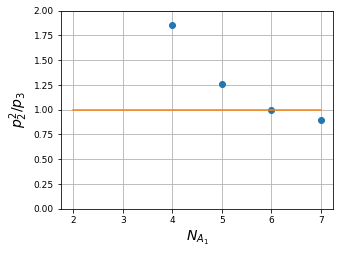

In [66]:
Na=6
La=2**Na
Na1=Na/2
Na2=Na-Na1
La1= 2**Na1
La2= 2**Na2

Nblist=np.arange(2,8)
Lb=2**Nblist
p2= (La+Lb)/(La*Lb)
p3= (La1**2+ La2**2+ Lb**2 + 3*La*Lb)/(La*Lb)**2 

plt.figure(figsize=(4.8,3.6))
fsize=9
plt.rcParams.update({'font.size': fsize})
plt.plot(Nblist,p2**2/p3,'o')
plt.plot(Nblist,Nblist*0+1)
# plt.plot(Na1/Na,p2)

plt.ylabel('$p_2^2/p_3$',fontsize = fsize+5)
plt.xlabel('$N_{A_1}$',fontsize = fsize+5)
plt.ylim(0,2)
plt.grid()
plt.tight_layout()
# plt.savefig('figs/rmt_p3_ppt_Na_%d_Nb_%d.pdf' % (Na,Nb))
plt.show()

In [10]:
from scipy.integrate import quad, nquad

def Gz(z,a,b):
    '''Direct solution to G(z), faster but has numerical instability for large V
    a=  Lb/L2
    b=  Lb*L1/L2
    '''
    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    T= (R-D**0.5 +1j*0)**(1/3)
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.abs(np.imag(z4))

def integrand(z, a, b):
    return Gz(z,a,b)*np.abs(z)

def neg_calc(a,b):
    '''Calculates logneg by \int P(z)|z| dz
    where P(z) is spectral density'''
    options={'limit':500}
    integral= nquad(integrand, [[-np.inf, np.inf]], args=(a, b),opts=[options,options])[0]
    return integral

# interact(logneg_plotter, V=(4,32,4),Ra=(0,1,0.05));

In [35]:
# shows finite size effects (previous cell contains the functions, next cell contains plots)
r=2 # local Hilbert space dim

Na=10
La=2**Na
# Na1=np.arange(0,Na/2)
Na1=np.linspace(0,1,100)*Na/2
Na2=Na-Na1
La1= 2**Na1
La2= 2**Na2

Nblist=np.arange(6,10)

logneg=np.zeros((len(Na1),len(Nblist)))
for i_b in range(len(Nblist)):
    Nb=Nblist[i_b]
    t_timer=time.time()
    
    for i_a in range(len(Na1)):
        Lb= r**(Nb)
        L1= r**(Na1[i_a])
        L2= r**(Na2[i_a])

        a = Lb/L2 +1j*0
        b = Lb/L2*L1 +1j*0
        logneg[i_a,i_b]=np.log2(neg_calc(a,b)*(L2*L1)/pi/(L1*Lb))    
        
    elapsed = time.time() - t_timer
    print("logneg was calculated for %d qubits" % (Na+Nb) + ", elapsed time = %.2f " % (elapsed)+ "sec")

logneg was calculated for 16 qubits, elapsed time = 4.59 sec
logneg was calculated for 17 qubits, elapsed time = 4.44 sec
logneg was calculated for 18 qubits, elapsed time = 4.25 sec


/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


logneg was calculated for 19 qubits, elapsed time = 5.03 sec


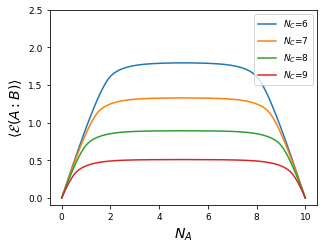

In [37]:
plt.figure(figsize=(4.8,3.6))
fsize=9
plt.rcParams.update({'font.size': fsize})
for i_b in range(len(Nblist)):
    Nb=Nblist[i_b]
    xplot =np.concatenate((Na1,Na/2+Na1))
    yplot = np.concatenate((logneg[:,i_b],logneg[::-1,i_b]))
    plt.plot(xplot,yplot,'-',label='$N_C$=%d' % (Nb),color='C%d' % (i_b))


# plt.xlim(0,R12_list[-1])
plt.ylim(-0.1,2.5)
plt.xlabel('$N_A$',fontsize = fsize+5)
plt.ylabel(r'$\langle{\cal E}(A:B)\rangle$',fontsize = fsize+5)
plt.legend(fontsize=fsize)
plt.savefig('figs/rmt_LN_R12_Na_%d.pdf' % (Na))
plt.show()